In [8]:
import sys
sys.executable

'/workspaces/manufacturing-lakehouse/.venv/bin/python'

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

from IPython.display import display


In [ ]:
from pathlib import Path
Path.cwd()

PosixPath('/workspaces/manufacturing-lakehouse/notebooks')

In [12]:
columns = (
    ["engine_id", "cycle"]
    + [f"op_setting_{i}" for i in range(1, 4)]
    + [f"sensor_{i}" for i in range(1, 22)]
)

In [13]:
from pathlib import Path
DATA_PATH = Path("/workspaces/manufacturing-lakehouse/data/raw/cmapss/train_FD001.txt")

assert DATA_PATH.exists(), f"File not found: {DATA_PATH}"

df = pd.read_csv(
    DATA_PATH,
    sep=r"\s+",
    header=None,
    names=columns
)

In [14]:
df.info()
df.describe().T

<class 'pandas.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-null  float64

,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [17]:
display(df.head())
df.shape

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


(20631, 26)

**Mandatory Profiling** <br>
Cardinality & Scale

In [19]:
df["engine_id"].nunique()  # number of engines
df.groupby("engine_id")["cycle"].max().describe()  # cycle distributions

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

**Observations:**
* 100 engines in FD001 subset.
* Lifetimes vary from 128 → 362 cycles, median ~199 cycles.
* Confirms relative time per engine is needed.

Time Semantics Check

In [20]:
df.groupby("engine_id")["cycle"].apply(lambda x: (x.diff().dropna() == 1).all()).value_counts()

cycle
True    100
Name: count, dtype: int64

**Observations:**
* Every engine has consecutive cycles.
* Time is relative; no global timestamp exists.

Failure Semantics

In [21]:
failure_cycles = df.groupby("engine_id")["cycle"].max()
failure_cycles.head()

engine_id
1    192
2    287
3    179
4    189
5    269
Name: cycle, dtype: int64

**Observations:**
* Failure is last recorded cycle per engine.
* Downtime is not explicitly recorded — MTBF/MTTR must be derived.

Missingness & Data Quality

In [26]:
display(df.isna().sum().sum())  # total missing
df.describe().T  # stats per column

np.int64(0)

,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


**Observations:**
* No missing values.
* describe() shows several sensors are constant or near-constant, which affects analysis.

**Sensor Behavior Exploration** <br>
Constant vs Informative Sensors

In [27]:
sensor_cols = [c for c in df.columns if c.startswith("sensor")]
df[sensor_cols].std().sort_values()

sensor_1     0.000000e+00
sensor_10    0.000000e+00
sensor_19    0.000000e+00
sensor_18    0.000000e+00
sensor_16    3.469531e-18
sensor_5     5.329200e-15
sensor_6     1.388985e-03
sensor_15    3.750504e-02
sensor_8     7.098548e-02
sensor_13    7.191892e-02
sensor_21    1.082509e-01
sensor_20    1.807464e-01
sensor_11    2.670874e-01
sensor_2     5.000533e-01
sensor_12    7.375534e-01
sensor_7     8.850923e-01
sensor_17    1.548763e+00
sensor_3     6.131150e+00
sensor_4     9.000605e+00
sensor_14    1.907618e+01
sensor_9     2.208288e+01
dtype: float64

**Observations:**
* Sensors 1, 5, 10, 16, 18, 19 → effectively constant → exclude from modeling or KPIs.
* Sensors 2, 3, 4, 9, 14, 17 → highly variable → informative for degradation / RUL.

**Insight:**
* The assumption that "Sensors 2, 3, 4 show clear monotonic trends" is only partially true — some sensors show strong degradation signals (e.g., 11, 4, 15, 2), while others may fluctuate non-monotonically.

Degradation Visualization

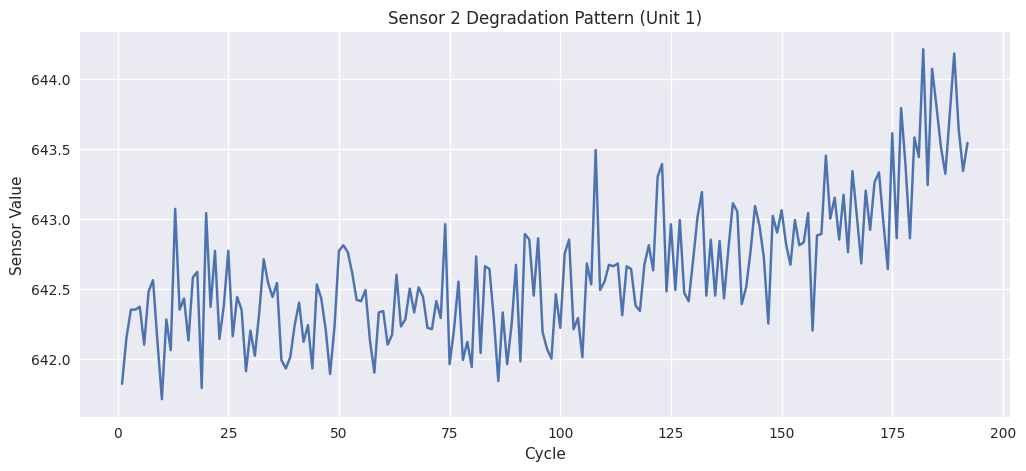

In [28]:
unit_id = 1
unit_df = df[df["engine_id"] == unit_id]

plt.figure(figsize=(12, 5))
plt.plot(unit_df["cycle"], unit_df["sensor_2"])
plt.title("Sensor 2 Degradation Pattern (Unit 1)")
plt.xlabel("Cycle")
plt.ylabel("Sensor Value")
plt.show()

Correlation With Remaining Useful Life

In [30]:
df["rul"] = df.groupby("engine_id")["cycle"].transform("max") - df["cycle"]

df[sensor_cols + ["rul"]].corr()["rul"].sort_values()

sensor_11   -0.696228
sensor_4    -0.678948
sensor_15   -0.642667
sensor_2    -0.606484
sensor_17   -0.606154
sensor_3    -0.584520
sensor_8    -0.563968
sensor_13   -0.562569
sensor_9    -0.390102
sensor_14   -0.306769
sensor_6    -0.128348
sensor_20    0.629428
sensor_21    0.635662
sensor_7     0.657223
sensor_12    0.671983
rul          1.000000
sensor_1          NaN
sensor_5          NaN
sensor_10         NaN
sensor_16         NaN
sensor_18         NaN
sensor_19         NaN
Name: rul, dtype: float64

**Observations:**
* Negative correlation → sensor decreases as RUL decreases.
    - Leading degradation indicators: sensor_11, 4, 15, 2, 17, 3
* Positive correlation → sensor increases as RUL decreases.
    - Possibly secondary indicators: sensor_20, 21, 7, 12
* Some constant sensors (1,5,10,16,18,19) → NaN correlation → exclude.

**Insight:**
* Not all original suggested sensors are monotonic; use correlation + trend plots to pick features.

#### Key Observations (Summary)

- Time is **relative and unit-scoped**; global aggregation is invalid.
- Failure is **implicit at the last cycle per engine**; downtime not recorded explicitly.
- Several sensors are **constant or near-constant** (sensor_1, 5, 10, 16, 18, 19) → candidates for exclusion.
- Informative sensors for degradation / RUL:
  - Strong negative correlation: sensor_11, 4, 15, 2, 17, 3
  - Positive correlation: sensor_20, 21, 7, 12 (may indicate secondary behavior)
- Sensor trends are **not always monotonic**; some fluctuate slightly or plateau.
- No missing values observed; numeric ranges are physically plausible.